<a href="https://colab.research.google.com/github/hitanshu5/Time-Series/blob/main/TSAEXP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
series = pd.read_csv(r'/content/FB.csv', header=0, index_col=0)
series.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


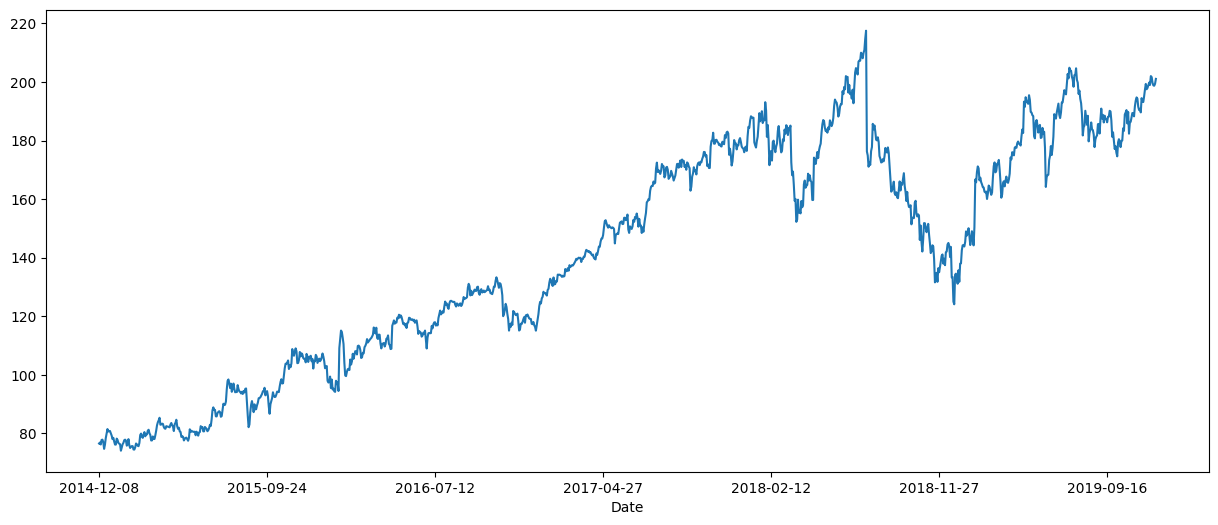

In [ ]:
series['Close'].plot(figsize=(15,6))
plt.show()

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data.
    #T is simply the calculated difference represented in units of standard error.
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','Lags Used','No. of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1%, 5%, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(series['Close'], 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistics               -1.338096
p-value                        0.611568
Lags Used                      0.000000
No. of Observations Used    1258.000000
Critical Value (1%)           -3.435559
Critical Value (5%)           -2.863840
Critical Value (10%)          -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


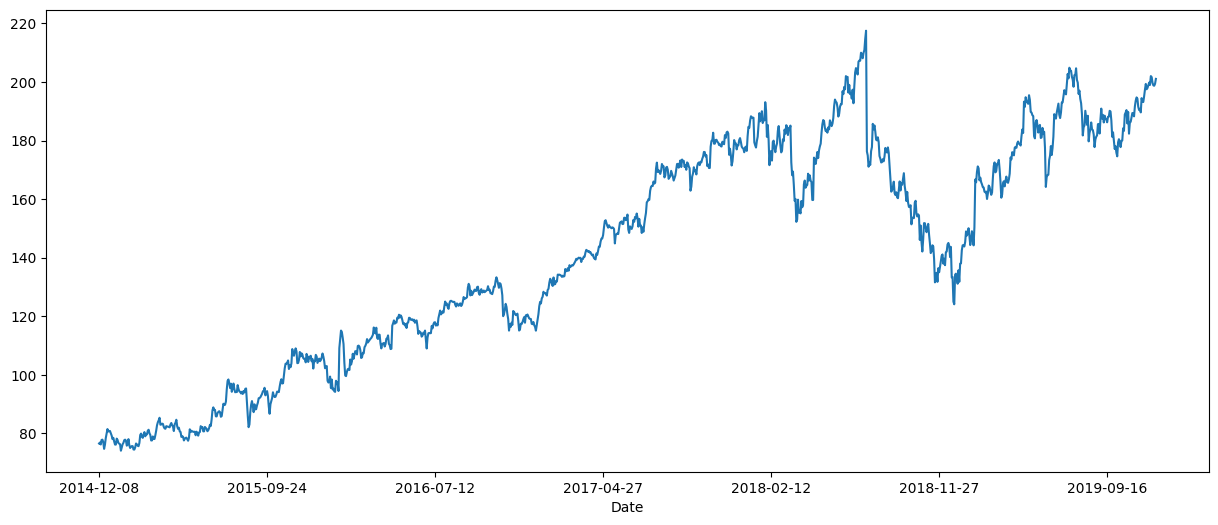

In [ ]:
series['Close'].plot(figsize=(15,6))
plt.show()

In [ ]:
Augmented_Dickey_Fuller_Test_func(series['Close'].diff().dropna(),'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistics              -36.114559
p-value                        0.000000
Lags Used                      0.000000
No. of Observations Used    1257.000000
Critical Value (1%)           -3.435563
Critical Value (5%)           -2.863842
Critical Value (10%)          -2.567996
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


<Axes: xlabel='Date'>

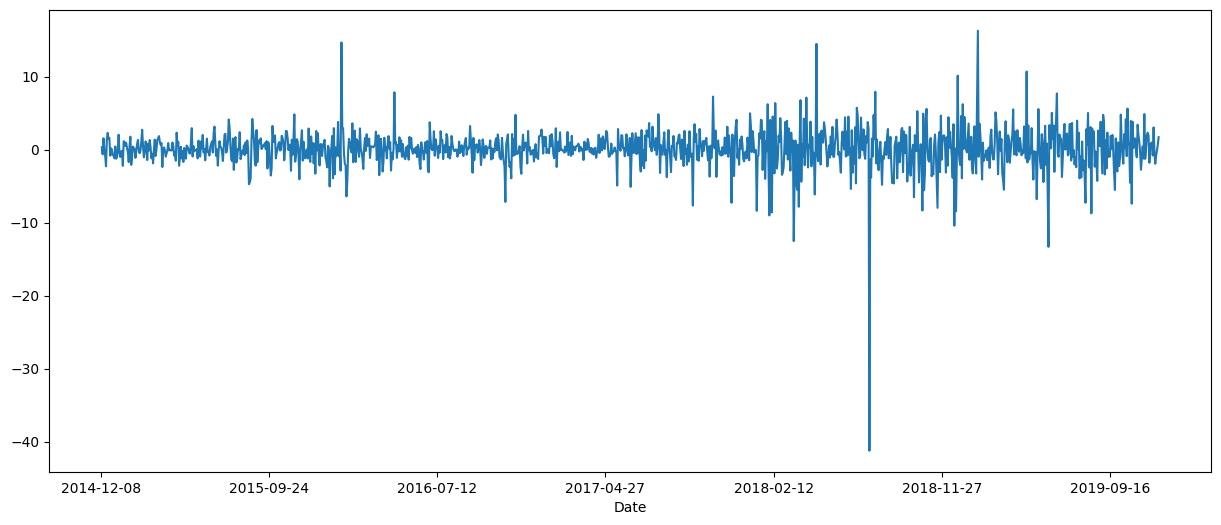

In [ ]:
series['Close'].diff().plot(figsize=(15,6))

In [ ]:
df = pd.read_excel('/content/India_Exchange_Rate_Dataset (1).xls',index_col = 0)
df.head()

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927


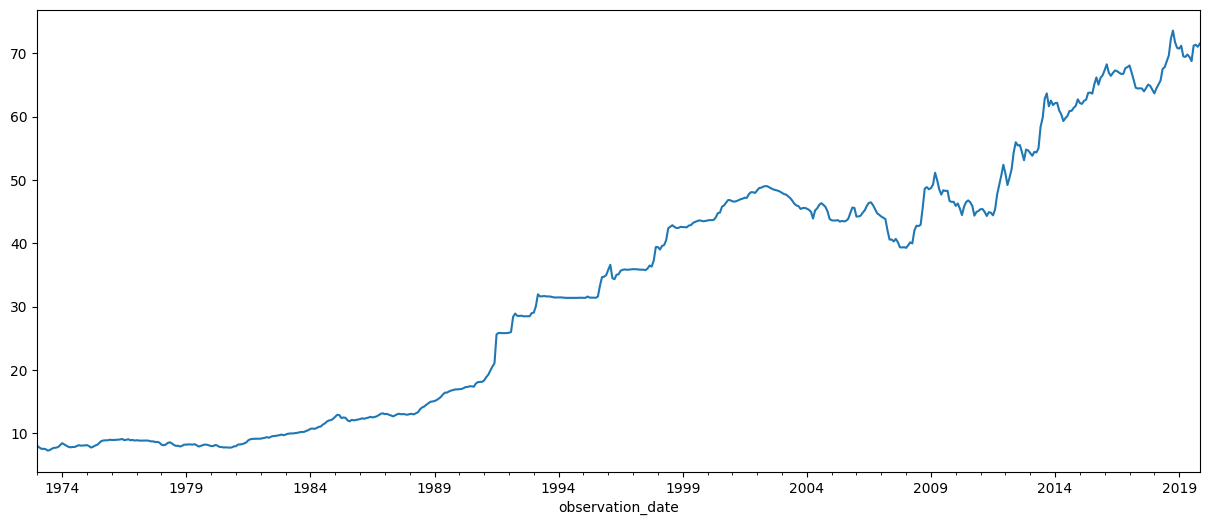

In [ ]:
df['EXINUS'].plot(figsize=(15,6))
plt.show()

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['EXINUS'], 'EXINUS')

Results of Dickey-Fuller Test for column: EXINUS
Test Statistics               0.805817
p-value                       0.991729
Lags Used                    17.000000
No. of Observations Used    545.000000
Critical Value (1%)          -3.442406
Critical Value (5%)          -2.866858
Critical Value (10%)         -2.569602
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
Augmented_Dickey_Fuller_Test_func(df['EXINUS'].diff().dropna(), 'EXINUS')

Results of Dickey-Fuller Test for column: EXINUS
Test Statistics            -6.379072e+00
p-value                     2.245677e-08
Lags Used                   1.600000e+01
No. of Observations Used    5.450000e+02
Critical Value (1%)        -3.442406e+00
Critical Value (5%)        -2.866858e+00
Critical Value (10%)       -2.569602e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


<Axes: xlabel='observation_date'>

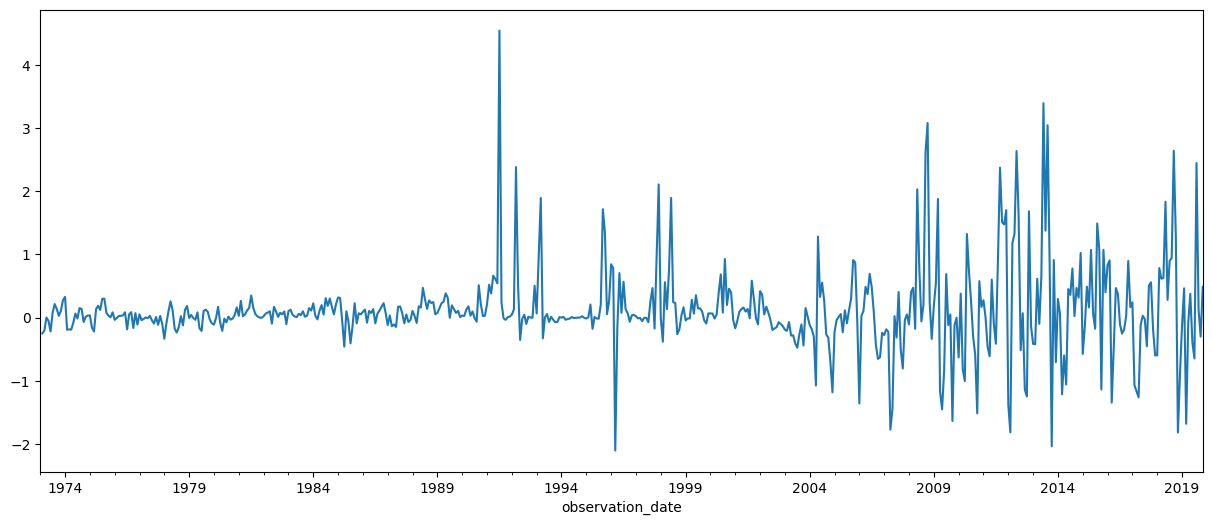

In [ ]:
df['EXINUS'].diff().plot(figsize=(15,6))

In [ ]:
dataset = pd.read_excel('/content/Country_GDP.xlsx',index_col='Time')
dataset.head()

,GDP
Time,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442


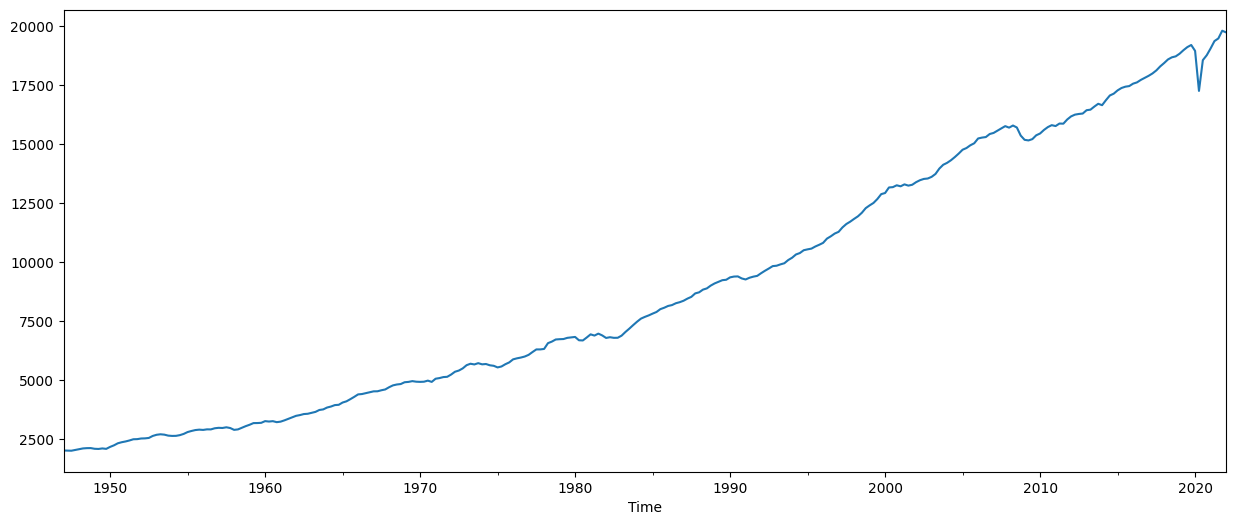

In [ ]:
dataset['GDP'].plot(figsize=(15,6))
plt.show()

In [ ]:
Augmented_Dickey_Fuller_Test_func(dataset['GDP'], 'GDP')

Results of Dickey-Fuller Test for column: GDP
Test Statistics               2.684049
p-value                       0.999086
Lags Used                     1.000000
No. of Observations Used    299.000000
Critical Value (1%)          -3.452411
Critical Value (5%)          -2.871255
Critical Value (10%)         -2.571947
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
Augmented_Dickey_Fuller_Test_func(dataset['GDP'].diff().dropna(), 'GDP')

Results of Dickey-Fuller Test for column: GDP
Test Statistics             -19.603998
p-value                       0.000000
Lags Used                     0.000000
No. of Observations Used    299.000000
Critical Value (1%)          -3.452411
Critical Value (5%)          -2.871255
Critical Value (10%)         -2.571947
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


<Axes: xlabel='Time'>

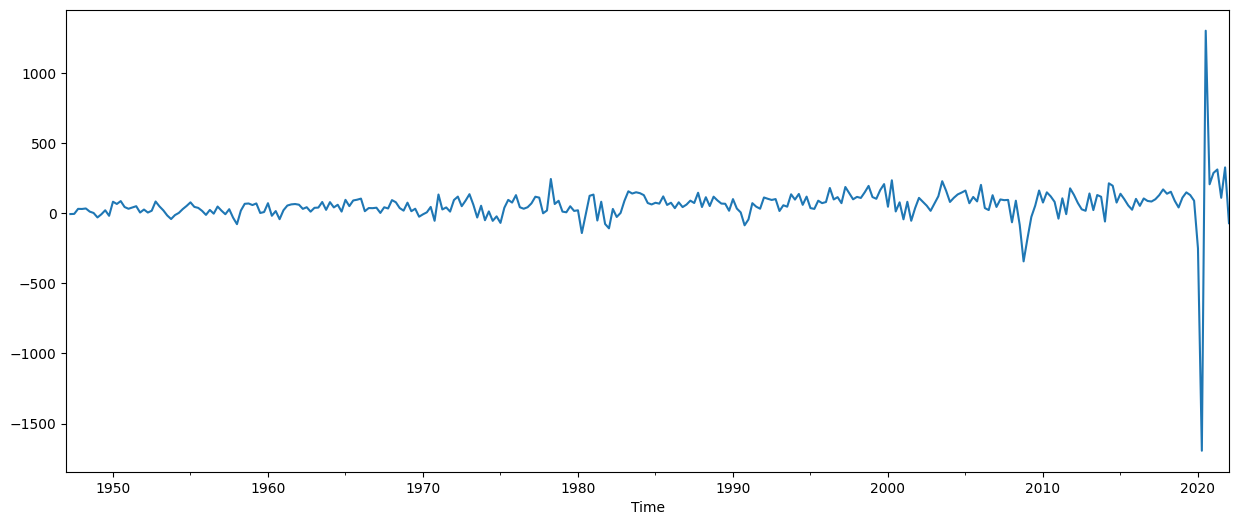

In [ ]:
dataset['GDP'].diff().plot(figsize=(15,6))

### **CONCLUSION:** After implementing the Augmented Dickey-Fuller (ADF) test, if the test statistic is more negative than the critical values and the p-value is below the chosen significance level (e.g., 0.05), we reject the null hypothesis, indicating that the data is stationary. Otherwise, if the p-value is higher and the test statistic is not significantly more negative, the data contains a unit root, implying non-stationarity. In such a case, differencing may be applied to achieve stationarity.